In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal

In [ ]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

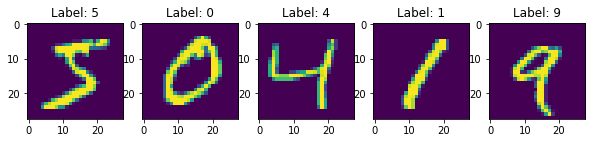

In [ ]:
#Show data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(10, 10))

for i in range(5):
    ax[i].imshow(X_train[i])
    ax[i].set_title(f"Label: {y_train[i]}")
    
plt.show()

In [ ]:
#reshape to vector
X_train = X_train.reshape(X_train.shape[0],28*28)

In [ ]:
X_train = X_train / 255.0

In [ ]:
# import numpy as np
# print(X_train)

# X_train_reshaped = np.reshape(X_train[0], (28, 28))
# print(X_train_reshaped)

# #display the reshaped array as an image
# import matplotlib.pyplot as plt
# plt.imshow(X_train_reshaped, cmap='gray')
# plt.show()

In [ ]:
#khởi tạo một phân phối ngẫu nhiên (RandomNormal) với giá trị trung bình (mean) là 1 và độ lệch chuẩn (stddev) là 1. Phân phối này được sử dụng để khởi tạo trọng số (weights) cho các lớp trong mô hình.
w_init = RandomNormal(mean = 1, stddev = 1)

In [ ]:
# khởi tạo một mô hình tuần tự (Sequential). Mô hình tuần tự là một kiểu mô hình đơn giản trong Keras, trong đó các lớp được xếp chồng lên nhau theo thứ tự tương ứng với luồng dữ liệu của chúng.
model = Sequential()
#thêm một lớp Dense với 128 nơ-ron và hàm kích hoạt sigmoid. Lớp này sẽ nhận đầu vào có kích thước 28*28 (kích thước của hình ảnh đầu vào) và sử dụng phân phối ngẫu nhiên được khởi tạo từ đầu tiên để khởi tạo trọng số.
model.add(Dense(128, activation='sigmoid', kernel_initializer=w_init, input_dim = 28*28))
#thêm một lớp Dense với 10 nơ-ron và hàm kích hoạt softmax. Lớp này sẽ đưa ra dự đoán cho 10 lớp (tương ứng với 10 chữ số từ 0 đến 9). Lớp này cũng sử dụng phân phối ngẫu nhiên được khởi tạo từ đầu tiên để khởi tạo trọng số.
model.add(Dense(10, activation='softmax', kernel_initializer=w_init))
#biên dịch mô hình bằng cách sử dụng hàm mất mát sparse_categorical_crossentropy và thuật toán tối ưu adam. sparse_categorical_crossentropy được sử dụng khi chúng ta có các nhãn mục tiêu ở dạng số nguyên (ví dụ như trong bộ dữ liệu MNIST). Thuật toán tối ưu adam là một thuật toán gradient descent được sử dụng để tối ưu hàm mất mát.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


loss='sparse_categorical_crossentropy' được sử dụng để đánh giá sự khác biệt giữa các giá trị dự đoán của mô hình và các nhãn thực tế. Loại hàm mất mát này được sử dụng cho bài toán phân loại đa lớp, trong đó mỗi mẫu được chỉ định bởi một số nguyên là nhãn của lớp tương ứng của nó.

optimizer='adam' là một thuật toán tối ưu hóa sử dụng để điều chỉnh các tham số mô hình để giảm thiểu hàm mất mát. Adam là một trong những thuật toán tối ưu hóa phổ biến trong deep learning.

metrics=['accuracy'] được sử dụng để đánh giá độ chính xác của mô hình. Trong trường hợp này, độ chính xác được sử dụng làm độ đo để đánh giá hiệu suất của mô hình.

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 128)
#Epochs đại diện cho số lần mà mô hình sẽ được huấn luyện trên toàn bộ tập dữ liệu. 
#Ví dụ, nếu epochs được đặt là 10, thì mô hình sẽ được huấn luyện qua toàn bộ tập dữ liệu 10 lần.

#Batch_size đại diện cho số lượng mẫu dữ liệu được sử dụng trong mỗi lần cập nhật trọng số của mô hình. 
#Nó cho biết bao nhiêu mẫu dữ liệu được truyền vào mô hình trong mỗi lần huấn luyện. 
#Ví dụ, nếu batch_size được đặt là 128, thì mỗi lần huấn luyện, mô hình sẽ được huấn luyện trên 128 mẫu dữ liệu.
#Các giá trị Batch size thường dùng là 32, 64, 128, 256... (2^n để việc tính toán được nhanh hơn)


Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 2.3095 - accuracy: 0.1045
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 2.3096 - accuracy: 0.1023
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 2.3086 - accuracy: 0.1065
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 2.3099 - accuracy: 0.1036
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 2.3090 - accuracy: 0.1022
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 2.3088 - accuracy: 0.1034
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 2.2847 - accuracy: 0.0963
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1578 - accuracy: 0.1525
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 2.0795 - accuracy: 0.1821
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 2.0344 - accuracy: 0.1943

**Bài Học**
1. vấn đề vanishing gradient xảy ra do giá trị gradient quá thấp, gây ra sự cải thiện rất nhỏ hoặc không đáng kể trong trọng số (Weights). Điều này ảnh hưởng đến quá trình huấn luyện mô hình và khiến cho mô hình không đạt được hiệu quả như mong muốn.
2. chúng ta không sử dụng hàm 'sigmoid' trong hidden layer của mạng neural vì chúng cho ra gradient rất thấp trong quá trình lan truyền ngược (backpropogation). Điều này ảnh hưởng đến khả năng học của mô hình và gây ra vấn đề vanishing gradient. Thay vào đó, chúng ta sử dụng các hàm kích hoạt khác như ReLU, LeakyReLU hoặc ELU